In [7]:
import pandas as pd
import numpy as np
from nixtla import NixtlaClient

In [8]:
client = NixtlaClient(
    api_key='nixak-5dPY6KBAgeehHImYkWhTObEV9dAfX99eVjyE4zIsRswQ8jMKJURj15IDpvWJoDlzvR4tVuSSYldQ9TBf'
)
client.validate_api_key()

True

In [9]:
df = pd.read_csv('/Users/pepijnschouten/Desktop/Python_Scripts/Python_scripts_Varia/Deep_Learning/NeuralForecast/data/bitcoin_historical_data.csv')

df['timestamp'] = pd.to_datetime(df['timestamp']
)
df.index = df['timestamp']
df = df.resample('MS').mean()
df = df.drop(['timestamp'], axis=1)
df = df.reset_index()
df = df[df['timestamp'] > '2017-01-01']

df.head()

,timestamp,open,high,low,close,vwap,volume,count
42,2017-02-01,1026.65,1149.60,953.85,1095.60,1055.85,130641.855481,211731.0
43,2017-03-01,991.20,1184.55,830.40,985.35,1004.00,221222.006084,346459.5
44,2017-04-01,1128.40,1338.00,1110.65,1326.70,1224.95,139944.324872,296918.0
45,2017-05-01,1751.35,2356.75,1566.45,2201.50,1908.00,305926.916078,611326.5
46,2017-06-01,2402.65,2528.00,1947.80,2296.55,2271.25,218745.543624,464663.0


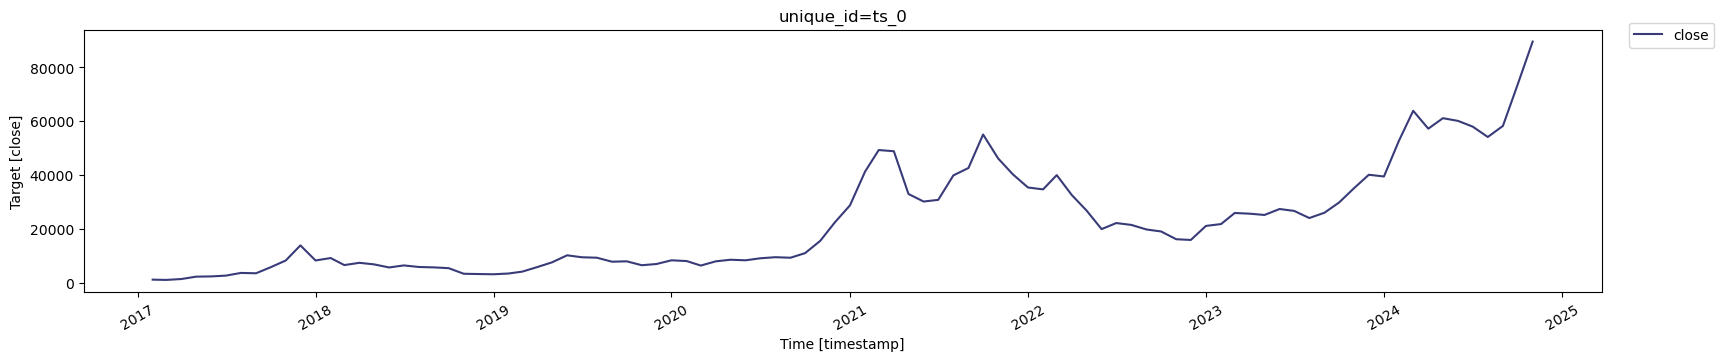

In [10]:
client.plot(df,
            time_col='timestamp',
            target_col='close')

In [14]:
horizon = 12
ci = [50, 90]
timegpt_fcst_df = client.forecast(
    df=df,
    h=horizon,
    freq='MS',
    time_col='timestamp',
    target_col='close',
    level=ci,
    add_history=True,
    finetune_steps=200
)

INFO:nixtla.nixtla_client:Validating inputs...
/opt/miniconda3/envs/nixtla/lib/python3.12/site-packages/nixtla/nixtla_client.py:360: UserWarning: `df` contains the following exogenous features: ['open', 'high', 'low', 'vwap', 'volume', 'count'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


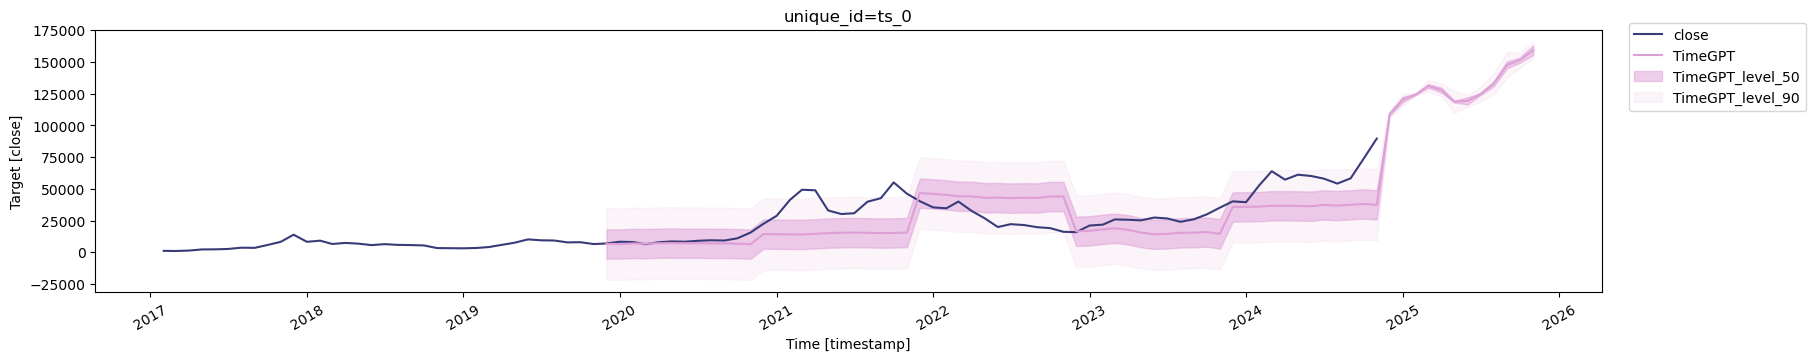

In [16]:
client.plot(df,
            timegpt_fcst_df,
            time_col='timestamp',
            target_col='close',
            level=ci)